<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,20.591620,30.107830,-2.855450,57.844000,60.190348,-2.346348
1,0.0,1.0,28.251731,42.954660,-1.589056,79.617336,80.741419,-1.124083
2,0.0,2.0,24.687900,59.075635,2.939747,96.703282,93.154117,3.549165
3,0.0,3.0,58.889540,64.418518,-4.817859,128.490199,133.187357,-4.697159
4,0.0,4.0,72.001874,34.926060,3.138741,120.066674,117.171465,2.895209
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.387205,50.373812,-2.016354,114.744662,116.841081,-2.096419
119996,999.0,116.0,67.869422,90.883431,2.360019,171.112872,168.970869,2.142002
119997,999.0,117.0,76.314442,69.076059,-3.234232,152.156270,155.489229,-3.332960
119998,999.0,118.0,29.758099,32.142083,-1.537461,70.362721,71.984229,-1.621507


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,20.591620,30.107830,-2.855450,57.844000,60.190348,-2.346348
1,0.0,1.0,28.251731,42.954660,-1.589056,79.617336,80.741419,-1.124083
2,0.0,2.0,24.687900,59.075635,2.939747,96.703282,93.154117,3.549165
3,0.0,3.0,58.889540,64.418518,-4.817859,128.490199,133.187357,-4.697159
4,0.0,4.0,72.001874,34.926060,3.138741,120.066674,117.171465,2.895209
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.387205,50.373812,-2.016354,114.744662,116.841081,-2.096419
119996,999.0,116.0,67.869422,90.883431,2.360019,171.112872,168.970869,2.142002
119997,999.0,117.0,76.314442,69.076059,-3.234232,152.156270,155.489229,-3.332960
119998,999.0,118.0,29.758099,32.142083,-1.537461,70.362721,71.984229,-1.621507


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    20.591620  30.107830 -2.855450   57.844000   60.190348 -2.346348
      1.0    28.251731  42.954660 -1.589056   79.617336   80.741419 -1.124083
      2.0    24.687900  59.075635  2.939747   96.703282   93.154117  3.549165
      3.0    58.889540  64.418518 -4.817859  128.490199  133.187357 -4.697159
      4.0    72.001874  34.926060  3.138741  120.066674  117.171465  2.895209
...                ...        ...       ...         ...         ...       ...
999.0 115.0  56.387205  50.373812 -2.016354  114.744662  116.841081 -2.096419
      116.0  67.869422  90.883431  2.360019  171.112872  168.970869  2.142002
      117.0  76.314442  69.076059 -3.234232  152.156270  155.489229 -3.332960
      118.0  29.758099  32.142083 -1.537461   70.362721   71.984229 -1.621507
      119.0  61.008418  57.824541  1.373265  130.206225  128.930672  1.275553

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    20.591620  30.107830 -2.855450   57.844000   60.190348 -2.346348
      1.0    28.251731  42.954660 -1.589056   79.617336   80.741419 -1.124083
      2.0    24.687900  59.075635  2.939747   96.703282   93.154117  3.549165
      3.0    58.889540  64.418518 -4.817859  128.490199  133.187357 -4.697159
      4.0    72.001874  34.926060  3.138741  120.066674  117.171465  2.895209
...                ...        ...       ...         ...         ...       ...
999.0 115.0  56.387205  50.373812 -2.016354  114.744662  116.841081 -2.096419
      116.0  67.869422  90.883431  2.360019  171.112872  168.970869  2.142002
      117.0  76.314442  69.076059 -3.234232  152.156270  155.489229 -3.332960
      118.0  29.758099  32.142083 -1.537461   70.362721   71.984229 -1.621507
      119.0  61.008418  57.824541  1.373265  130.206225  128.930672  1.275553

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,20.591620,30.107830,-2.855450,57.844000,60.190348,-2.346348
1,0.0,1.0,28.251731,42.954660,-1.589056,79.617336,80.741419,-1.124083
2,0.0,2.0,24.687900,59.075635,2.939747,96.703282,93.154117,3.549165
3,0.0,3.0,58.889540,64.418518,-4.817859,128.490199,133.187357,-4.697159
4,0.0,4.0,72.001874,34.926060,3.138741,120.066674,117.171465,2.895209
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.387205,50.373812,-2.016354,114.744662,116.841081,-2.096419
119996,999.0,116.0,67.869422,90.883431,2.360019,171.112872,168.970869,2.142002
119997,999.0,117.0,76.314442,69.076059,-3.234232,152.156270,155.489229,-3.332960
119998,999.0,118.0,29.758099,32.142083,-1.537461,70.362721,71.984229,-1.621507


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    20.591620  30.107830 -2.855450   57.844000   60.190348 -2.346348
      1.0    28.251731  42.954660 -1.589056   79.617336   80.741419 -1.124083
      2.0    24.687900  59.075635  2.939747   96.703282   93.154117  3.549165
      3.0    58.889540  64.418518 -4.817859  128.490199  133.187357 -4.697159
      4.0    72.001874  34.926060  3.138741  120.066674  117.171465  2.895209
...                ...        ...       ...         ...         ...       ...
999.0 115.0  56.387205  50.373812 -2.016354  114.744662  116.841081 -2.096419
      116.0  67.869422  90.883431  2.360019  171.112872  168.970869  2.142002
      117.0  76.314442  69.076059 -3.234232  152.156270  155.489229 -3.332960
      118.0  29.758099  32.142083 -1.537461   70.362721   71.984229 -1.621507
      119.0  61.008418  57.824541  1.373265  130.206225  128.930672  1.275553

[120000 rows x 6 columns]

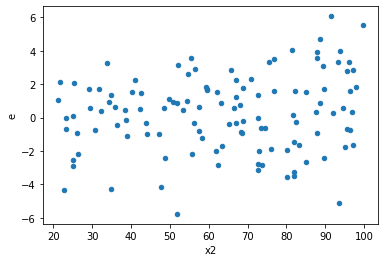

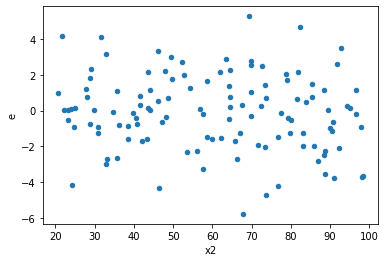

In [17]:
tablenew0 = table.loc[40.0]
tablenew1 = table.loc[78.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,46.0,46.0,191.69563786786654,218.4299950453341,4.167296475388403,4.748478153159437,1.139462522333947,0.6598035532805366,0.6700982233597317,0.3299017766402683,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,186.81295717442026,300.76797545356237,4.06115124292218,6.5384342489904865,1.6099952594441647,0.10987099133545719,0.9450645043322714,0.054935495667728595,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,236.98599823741068,343.8102692528963,5.151869526900232,7.4741362881064415,1.4507619513810681,0.2107870759583208,0.8946064620208396,0.1053935379791604,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,140.7185355979442,267.9520664869224,3.0590985999553086,5.825044923628747,1.9041703734929782,0.031241297366708,0.984379351316646,0.015620648683354,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,142.54301309804202,237.21744794973284,3.0987611543052616,5.156901042385496,1.6641815182240682,0.08749326466300777,0.9562533676684961,0.04374663233150389,Reject001=1 : Homoscedasticity
9.0,46.0,46.0,154.0972532918908,259.9059796709363,3.349940288954148,5.650129992846441,1.686636030939648,0.07955984346720779,0.9602200782663961,0.039779921733603896,Reject001=1 : Homoscedasticity
10.0,46.0,46.0,203.99994342864255,321.8184491438793,4.4347813788835335,6.996053242258246,1.5775418548409976,0.12576919432952716,0.9371154028352364,0.06288459716476358,Reject001=1 : Homoscedasticity
11.0,46.0,46.0,168.24562353662282,244.4477940403585,3.657513555143974,5.314082479138229,1.4529221557263772,0.2089783364463631,0.8955108317768185,0.10448916822318155,Reject001=1 : Homoscedasticity
12.0,46.0,46.0,251.51162447188028,329.29886845676714,5.467644010258267,7.158671053407981,1.3092789215934777,0.36412931612517196,0.817935341937414,0.18206465806258598,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,206.09925448516452,161.4900221091151,4.480418575764446,3.5106526545459804,0.783554615529866,0.4112699730396331,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,191.69563786786654,218.4299950453341,4.167296475388403,4.748478153159437,1.139462522333947,0.6598035532805366,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,227.84841484919997,221.1598439940638,4.953226409765216,4.807822695523126,0.9706446460926097,0.9199554866284556,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,186.81295717442026,300.76797545356237,4.06115124292218,6.5384342489904865,1.6099952594441647,0.10987099133545719,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,278.6013207775032,219.18701279544044,6.056550451684852,4.764935060770444,0.7867407526416135,0.41907705988951427,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,236.98599823741068,343.8102692528963,5.151869526900232,7.4741362881064415,1.4507619513810681,0.2107870759583208,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,140.7185355979442,267.9520664869224,3.0590985999553086,5.825044923628747,1.9041703734929782,0.031241297366708,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,142.54301309804202,237.21744794973284,3.0987611543052616,5.156901042385496,1.6641815182240682,0.08749326466300777,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,212.8824745788553,179.96026607965027,4.627879882149029,3.9121796973837015,0.845350310943468,0.5711821866018173,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      962
Reject001=0 : Heteroscedasticity     38
Name: Result_test, dtype: int64